In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Import data
data = pd.read_csv('iris.csv')
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [4]:
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [5]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
# Standardize data
ss = StandardScaler()
X = ss.fit_transform(X)
X = pd.DataFrame(X, columns=data.columns[:-1])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


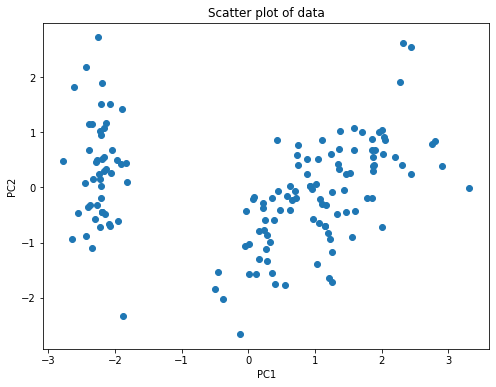

In [7]:
# Reduce dimension (PCA)
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X = pd.DataFrame(X, columns=['PC1', 'PC2'])
X.head()

# Data visualization
plt.figure(figsize=(8, 6))
plt.scatter(X['PC1'], X['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of data')
plt.show()

In [8]:
# Train the model
k_means = KMeans(n_clusters=3)
k_means_model = k_means.fit(X)

Text(0.5, 1.0, 'Predicted Clusters with the Cluster Centers')

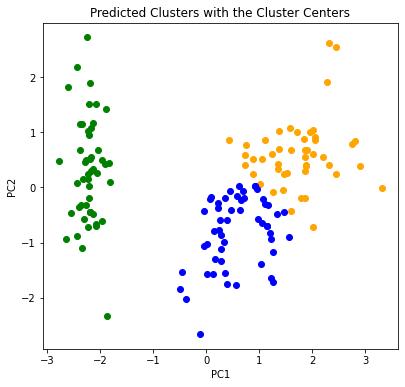

In [9]:
fig = plt.figure(figsize=(14, 6))
# predicted
ax1 = fig.add_subplot(121)
pred = k_means_model.predict(X)
colours = ['orange','green','blue']
for idx in range(3):
    plt.scatter(X[pred == idx]['PC1'], X[pred == idx]['PC2'], c = colours[idx])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted Clusters with the Cluster Centers')

In [10]:
k = 3 # 3 clusters
df_clusters = [X[k_means_model.labels_==i] for i in range(k)]
len(df_clusters)

3

In [11]:
stat_dict = { 
    'Cluster' :   list(range(k)),
    'Size' :      [len(df_clusters[i]) for i in range(k)],
    'Mean PC1' :  [round(df_clusters[i]['PC1'].mean(), 2) for i in range(k)],
    'Std PC1' :   [round(df_clusters[i]['PC1'].std(), 2) for i in range(k)],
    'Mean PC2' :  [round(df_clusters[i]['PC2'].mean(), 2) for i in range(k)],
    'Std pC2' :   [round(df_clusters[i]['PC2'].std(), 2) for i in range(k)]
}

In [12]:
df_cluster_stats = pd.DataFrame(stat_dict)
df_cluster_stats

,Cluster,Size,Mean PC1,Std PC1,Mean PC2,Std pC2
0,0,47,1.72,0.62,0.60,0.62
1,1,50,-2.22,0.20,0.29,0.94
2,2,53,0.57,0.52,-0.81,0.64
